In [14]:
import numpy as np
import matplotlib.pyplot as plt
from algorithm import *
import time

# Implementation

In [15]:
dimensions = [5, 20, 50, 100]
num_points = 10

# Q (positive), b, and radius (delta).
def generate_pos_qbr(dimensions: list, num_points: int, feasible: bool = True):
    Qbrs = []
    for dim in dimensions:
        for _ in range(num_points):
            Q, b = generate_pos_Q_b(dim)
            unconstrained_x_opt = -np.linalg.inv(Q) @ b
            if feasible:
                delta = np.linalg.norm(unconstrained_x_opt) + np.random.random()
                Qbrs.append((Q, b, delta))
            else:
                delta = np.linalg.norm(unconstrained_x_opt) * np.random.random()
                Qbrs.append((Q, b, delta))
    return Qbrs

# Q (negative), b, and radius (delta).
def generate_neg_qbr(dimensions: list, num_points: int):
    Qbrs = []
    for dim in dimensions:
        for _ in range(num_points):
            Q, b = generate_neg_Q_b(dim)
            delta = np.random.random()
            Qbrs.append((Q, b, delta))
    return Qbrs

In [16]:
# the value for epsilon can affect the result of checking KKT conditions
# because in KKT conditions, we use np.isclose to check if the value is close to 0
# if epsilon is made larger, the parameter 'atol' in np.isclose should also be made larger to avoid false negative

def generate_results (qbrs: list, epsilon: float = 1e-8):
    qbrx = []
    for qbr in qbrs:
        q, b, r = qbr
        try:
            x_opt = min_quad(q, b, r, epsilon)
            qbrx.append((q, b, r, x_opt))
        except Exception as e:
            print(e)
    return qbrx
    

def check_kkts (qbrx: list, atol: float = 1e-5):
    for qbrx in qbrx:
        q, b, r, x_opt = qbrx
        print("KKT: ", check_kkt(x_opt, q, b, r, atol))

def generate_timed_results (qbrs: list, epsilon_scale: float = 1e-8):
    qbrx = []
    times = []
    for qbr in qbrs:
        q, b, r = qbr
        epsilon = r * epsilon_scale
        try:
            start_time = time.time()
            x_opt = min_quad(q, b, r, epsilon)
            end_time = time.time()
            qbrx.append((q, b, r, x_opt))
            times.append(end_time - start_time)
        except Exception as e:
            print(e)
    return qbrx, times

## Case 1: Q positive, unconstrained_min feasible

In [17]:
inputs_1 = generate_pos_qbr(dimensions, num_points, True)
check_kkts(generate_results(inputs_1))

KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True


## Case 2: Q positive, unconstrained_min infeasible

In [18]:
inputs_2 = generate_pos_qbr(dimensions, num_points, False)
check_kkts(generate_results(inputs_2))

The algorithm did not converge in the bisection phase
The algorithm did not converge in the bisection phase
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True


## Case 3: Q negative, no unconstrained_min

In [19]:
inputs_3 = generate_neg_qbr(dimensions, num_points)
check_kkts(generate_results(inputs_3))

KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
KKT:  True
lambda_star * norm_constraint(x_star, Delta) = -1.784752093867159e-05
KKT:  None
KKT:  True
lambda_star * norm_constraint(x_star, Delta) = -2.2729286654422813e-05
KKT:  None
KKT:  True
KKT:  True
lambda_star * norm_constraint(x_star, Delta) = -1.2202347247682222e-05
KKT:  None


# Benchmark

### Finding optimal value of epsilon

In [71]:
epsilons = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12]
case1_times = []
case2_times = []

for e in epsilons:
    _, c1_time = generate_timed_results(inputs_1, e)
    _, c2_time = generate_timed_results(inputs_2, e)
    
    case1_times.append(np.mean(c1_time))
    case2_times.append(np.mean(c2_time))

The algorithm did not converge in the bisection phase
The algorithm did not converge in the bisection phase
The algorithm did not converge in the bisection phase
The algorithm did not converge in the bisection phase
The algorithm did not converge in the bisection phase
The algorithm did not converge in the bisection phase
The algorithm did not converge in the bisection phase
The algorithm did not converge in the bisection phase
The algorithm did not converge in the bisection phase
The algorithm did not converge in the bisection phase
The algorithm did not converge in the bisection phase
The algorithm did not converge in the bisection phase


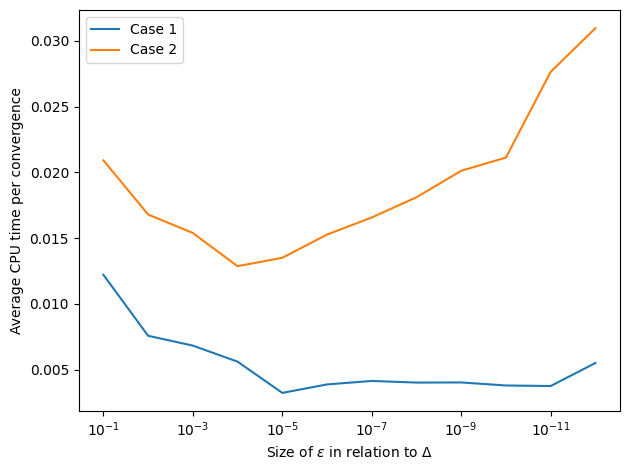

In [72]:
plt.plot(epsilons, case1_times, label='Case 1')
plt.plot(epsilons, case2_times, label='Case 2')


plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel(r'Size of $\epsilon$ in relation to $\Delta$')
plt.ylabel('Average CPU time per convergence')
plt.legend()
plt.tight_layout()
plt.show()